In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from catboost import CatBoostRegressor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, r2_score
import matplotlib.pyplot as plt

In [ ]:
binario = pd.read_csv("binario_classification.csv")
del binario['Unnamed: 0']
del binario['PORCENTAJE_CUMPLIMIENTO']
binario

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,...,VIVPAR_UT,PSINDER,VIVTOT,TOTHOG,PDER_SS,GRAPROES,POBTOT,P_60YMAS,P_18YMAS,EXITO
0,126,1,BC,Hogar,127.420000,13.0,7.000000,25.69107,-100.21261,Hogar Reunión,...,59.0,1596.0,2834.0,2480.0,6970.0,9.284107,8586.0,1859.0,6834.0,1
1,681,1,C,Hogar,128.130000,13.0,9.411462,25.73571,-100.18086,Hogar Reunión,...,101.0,1335.0,3960.0,3406.0,10220.0,11.720714,11564.0,349.0,7764.0,1
2,117,1,C,Base,87.620000,11.0,11.000000,25.71883,-100.19133,Hogar Reunión,...,22.0,1578.0,3042.0,2686.0,7380.0,11.551951,8976.0,812.0,6752.0,0
3,682,1,C,Hogar,90.700000,13.0,7.686207,25.66952,-100.20744,Hogar Reunión,...,41.0,726.0,1612.0,1391.0,3821.0,9.459211,4558.0,930.0,3685.0,1
4,275,1,C,Hogar,95.300000,13.0,6.000000,25.73766,-100.16116,Hogar Reunión,...,25.0,1666.0,3510.0,3114.0,10134.0,9.806957,11862.0,303.0,7742.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,572,6,C,Hogar,112.024552,13.0,7.730664,25.57330,-100.02196,Hogar Reunión,...,9.0,344.0,532.0,454.0,1170.0,8.148571,1514.0,80.0,924.0,1
938,492,6,B,Base,112.024552,13.0,7.730664,25.27251,-100.00065,Hogar Reunión,...,13.0,61.0,316.0,248.0,760.0,6.883158,834.0,107.0,585.0,1
939,172,6,CD,Receso,122.700000,8.0,9.866414,25.19135,-99.81539,Parada Técnica,...,30.0,528.0,1352.0,1048.0,2578.0,8.011951,3118.0,655.0,2347.0,1
940,748,6,C,Receso,99.276366,12.0,8.222563,25.27433,-100.01648,Parada Técnica,...,13.0,47.0,434.0,335.0,1135.0,6.304048,1248.0,183.0,972.0,1


In [ ]:
df_pruebas = binario.copy()
df_pruebas

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,...,VIVPAR_UT,PSINDER,VIVTOT,TOTHOG,PDER_SS,GRAPROES,POBTOT,P_60YMAS,P_18YMAS,EXITO
0,126,1,BC,Hogar,127.420000,13.0,7.000000,25.69107,-100.21261,Hogar Reunión,...,59.0,1596.0,2834.0,2480.0,6970.0,9.284107,8586.0,1859.0,6834.0,1
1,681,1,C,Hogar,128.130000,13.0,9.411462,25.73571,-100.18086,Hogar Reunión,...,101.0,1335.0,3960.0,3406.0,10220.0,11.720714,11564.0,349.0,7764.0,1
2,117,1,C,Base,87.620000,11.0,11.000000,25.71883,-100.19133,Hogar Reunión,...,22.0,1578.0,3042.0,2686.0,7380.0,11.551951,8976.0,812.0,6752.0,0
3,682,1,C,Hogar,90.700000,13.0,7.686207,25.66952,-100.20744,Hogar Reunión,...,41.0,726.0,1612.0,1391.0,3821.0,9.459211,4558.0,930.0,3685.0,1
4,275,1,C,Hogar,95.300000,13.0,6.000000,25.73766,-100.16116,Hogar Reunión,...,25.0,1666.0,3510.0,3114.0,10134.0,9.806957,11862.0,303.0,7742.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,572,6,C,Hogar,112.024552,13.0,7.730664,25.57330,-100.02196,Hogar Reunión,...,9.0,344.0,532.0,454.0,1170.0,8.148571,1514.0,80.0,924.0,1
938,492,6,B,Base,112.024552,13.0,7.730664,25.27251,-100.00065,Hogar Reunión,...,13.0,61.0,316.0,248.0,760.0,6.883158,834.0,107.0,585.0,1
939,172,6,CD,Receso,122.700000,8.0,9.866414,25.19135,-99.81539,Parada Técnica,...,30.0,528.0,1352.0,1048.0,2578.0,8.011951,3118.0,655.0,2347.0,1
940,748,6,C,Receso,99.276366,12.0,8.222563,25.27433,-100.01648,Parada Técnica,...,13.0,47.0,434.0,335.0,1135.0,6.304048,1248.0,183.0,972.0,1


In [ ]:
del df_pruebas['TIENDA_ID']

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [ ]:
tg = 'EXITO'
X = df_pruebas.loc[:, df_pruebas.columns != tg]
y = df_pruebas.loc[:, tg]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = [
    'PLAZA_CVE',
    'NIVELSOCIOECONOMICO_DES',
    'ENTORNO_DES',
    'SEGMENTO_MAESTRO_DESC',
    'LID_UBICACION_TIENDA',
    'CVE_AGEB'
]

In [ ]:
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [ ]:
model_cb = CatBoostClassifier(
    iterations=800,
    learning_rate=0.01,
    depth=6,
    eval_metric='F1',           # Focus on F1
    loss_function='Logloss',
    random_seed=42,
    auto_class_weights='SqrtBalanced'
)

In [ ]:
FINAL = model_cb.fit(X_train, y_train, cat_features=categorical_features)
y_pred = model_cb.predict(X_test)
accuracy = FINAL.score(X_test, y_test)

0:	learn: 0.7839222	total: 14.7ms	remaining: 11.8s
1:	learn: 0.8013609	total: 25.3ms	remaining: 10.1s
2:	learn: 0.8047614	total: 36.9ms	remaining: 9.81s
3:	learn: 0.8042882	total: 43.8ms	remaining: 8.71s
4:	learn: 0.8029739	total: 52.5ms	remaining: 8.35s
5:	learn: 0.8008632	total: 61.6ms	remaining: 8.15s
6:	learn: 0.7974785	total: 66ms	remaining: 7.48s
7:	learn: 0.7974785	total: 75.1ms	remaining: 7.43s
8:	learn: 0.7964378	total: 77.5ms	remaining: 6.81s
9:	learn: 0.7964378	total: 87ms	remaining: 6.87s
10:	learn: 0.7964378	total: 95.9ms	remaining: 6.88s
11:	learn: 0.7985218	total: 105ms	remaining: 6.9s
12:	learn: 0.7974785	total: 114ms	remaining: 6.92s
13:	learn: 0.7964378	total: 123ms	remaining: 6.91s
14:	learn: 0.7974785	total: 132ms	remaining: 6.93s
15:	learn: 0.7964378	total: 136ms	remaining: 6.64s
16:	learn: 0.7964378	total: 144ms	remaining: 6.65s
17:	learn: 0.7985218	total: 153ms	remaining: 6.66s
18:	learn: 0.7985218	total: 162ms	remaining: 6.67s
19:	learn: 0.7985218	total: 171ms	r

In [ ]:
from sklearn.metrics import classification_report

a = classification_report(y_test, y_pred)
print(a)

              precision    recall  f1-score   support

           0       0.44      0.23      0.30        30
           1       0.87      0.94      0.90       159

    accuracy                           0.83       189
   macro avg       0.65      0.59      0.60       189
weighted avg       0.80      0.83      0.81       189



                       Feature  Importance
5   CAJONESESTACIONAMIENTO_NUM   10.668223
1      NIVELSOCIOECONOMICO_DES    7.506464
0                    PLAZA_CVE    7.237997
2                  ENTORNO_DES    5.768767
9         LID_UBICACION_TIENDA    5.545347
7                 LONGITUD_NUM    5.249885
8        SEGMENTO_MAESTRO_DESC    4.925428
6                  LATITUD_NUM    4.515113
32                    GRAPROES    3.900822
3               MTS2VENTAS_NUM    3.640519
17                       Salud    3.110069
4            PUERTASREFRIG_NUM    2.959505
34                    P_60YMAS    2.943053
27                   VIVPAR_UT    2.843544
13                        OXXO    2.294183
26                    PROM_HNV    2.286633
11            Bares y Cervezas    2.229393
10                   Abarrotes    2.026964
28                     PSINDER    2.016470
25                     P_18A24    1.644491
16                    Escuelas    1.487690
35                    P_18YMAS    1.453826
20         

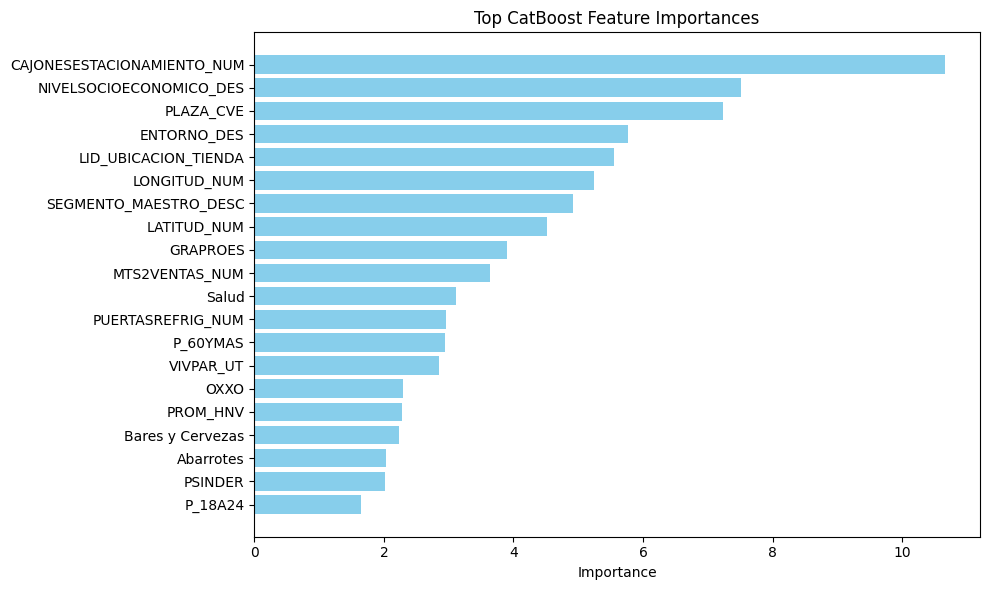

In [ ]:
importances = model_cb.get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

# Optional: plot the top N features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df['Feature'].head(top_n)[::-1],
    feature_importance_df['Importance'].head(top_n)[::-1],
    color='skyblue'
)
plt.xlabel("Importance")
plt.title("Top CatBoost Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Definir el modelo
model = CatBoostClassifier()

# Definir los parámetros de búsqueda de cuadrícula
grid = {'learning_rate': [0.1,0.15,0.2],
        'depth': [8,10,12],
        'iterations': [500,800,100]}

# Crear el objeto de búsqueda de cuadrícula
grid_search = GridSearchCV(model, grid, cv=3)

# Entrenar el modelo con la búsqueda de cuadrícula
grid_search.fit(X_train, y_train,cat_features=categorical_features)

# Obtener los mejores parámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntuación encontrada:", best_score)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
202:	learn: 30.3793977	total: 21.7s	remaining: 21.1s
203:	learn: 29.8328557	total: 21.8s	remaining: 21s
204:	learn: 29.7415998	total: 21.9s	remaining: 20.9s
205:	learn: 29.4031530	total: 22s	remaining: 20.8s
206:	learn: 29.1593836	total: 22.1s	remaining: 20.6s
207:	learn: 28.9077462	total: 22.2s	remaining: 20.5s
208:	learn: 28.3976367	total: 22.3s	remaining: 20.4s
209:	learn: 27.6283999	total: 22.5s	remaining: 20.3s
210:	learn: 27.6112677	total: 22.6s	remaining: 20.2s
211:	learn: 27.1415061	total: 22.7s	remaining: 20.1s
212:	learn: 27.0504688	total: 22.8s	remaining: 20s
213:	learn: 26.6733783	total: 22.9s	remaining: 19.9s
214:	learn: 26.3424939	total: 23s	remaining: 19.8s
215:	learn: 26.1154364	total: 23.1s	remaining: 19.7s
216:	learn: 26.0436391	total: 23.2s	remaining: 19.6s
217:	learn: 25.7680237	total: 23.3s	remaining: 19.5s
218:	learn: 25.7336008	total: 23.4s	remaining: 19.3s
219:	learn: 25.3977809	total: 23.5s	rema

In [ ]:
print("Mejores parámetros encontrados:", best_params)
print("Mejor puntuación encontrada:", best_score)

Mejores parámetros encontrados: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
Mejor puntuación encontrada: 0.13637254403933363


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

# Copy the data
dfxgb = pd.read_csv("binario_classification.csv")
del dfxgb['Unnamed: 0']
del dfxgb['PORCENTAJE_CUMPLIMIENTO']

In [ ]:
dfxgb

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,...,VIVPAR_UT,PSINDER,VIVTOT,TOTHOG,PDER_SS,GRAPROES,POBTOT,P_60YMAS,P_18YMAS,EXITO
0,126,1,BC,Hogar,127.420000,13.0,7.000000,25.69107,-100.21261,Hogar Reunión,...,59.0,1596.0,2834.0,2480.0,6970.0,9.284107,8586.0,1859.0,6834.0,1
1,681,1,C,Hogar,128.130000,13.0,9.411462,25.73571,-100.18086,Hogar Reunión,...,101.0,1335.0,3960.0,3406.0,10220.0,11.720714,11564.0,349.0,7764.0,1
2,117,1,C,Base,87.620000,11.0,11.000000,25.71883,-100.19133,Hogar Reunión,...,22.0,1578.0,3042.0,2686.0,7380.0,11.551951,8976.0,812.0,6752.0,0
3,682,1,C,Hogar,90.700000,13.0,7.686207,25.66952,-100.20744,Hogar Reunión,...,41.0,726.0,1612.0,1391.0,3821.0,9.459211,4558.0,930.0,3685.0,1
4,275,1,C,Hogar,95.300000,13.0,6.000000,25.73766,-100.16116,Hogar Reunión,...,25.0,1666.0,3510.0,3114.0,10134.0,9.806957,11862.0,303.0,7742.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,572,6,C,Hogar,112.024552,13.0,7.730664,25.57330,-100.02196,Hogar Reunión,...,9.0,344.0,532.0,454.0,1170.0,8.148571,1514.0,80.0,924.0,1
938,492,6,B,Base,112.024552,13.0,7.730664,25.27251,-100.00065,Hogar Reunión,...,13.0,61.0,316.0,248.0,760.0,6.883158,834.0,107.0,585.0,1
939,172,6,CD,Receso,122.700000,8.0,9.866414,25.19135,-99.81539,Parada Técnica,...,30.0,528.0,1352.0,1048.0,2578.0,8.011951,3118.0,655.0,2347.0,1
940,748,6,C,Receso,99.276366,12.0,8.222563,25.27433,-100.01648,Parada Técnica,...,13.0,47.0,434.0,335.0,1135.0,6.304048,1248.0,183.0,972.0,1


In [ ]:
# Count positive and negative instances
neg = (dfxgb['EXITO'] == 0).sum()
pos = (dfxgb['EXITO'] == 1).sum()

scale_pos_weight = pos / neg
print(f"scale_pos_weight = {scale_pos_weight:.4f}")

scale_pos_weight = 4.0645


In [ ]:
ategorical_features = [
    'PLAZA_CVE',
    'NIVELSOCIOECONOMICO_DES',
    'ENTORNO_DES',
    'CVE_AGEB',
    'LID_UBICACION_TIENDA',
    'SEGMENTO_MAESTRO_DESC'
]

# All other columns except target and categorical ones
target = 'EXITO'
all_features = dfxgb.columns.drop(target)
numerical_features = [col for col in all_features if col not in categorical_features]

In [ ]:
# Preprocessor: OneHot for categorical, SimpleImputer for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', SimpleImputer(strategy='mean'), numerical_features)
    ]
)

In [ ]:
# XGBoost classifier

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
'''
xgb_clf = GradientBoostingClassifier(
    random_state=42
)'''

# Combine preprocessing and model into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

In [ ]:
X = dfxgb.drop(columns=[target])
y = dfxgb[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:49:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PLAZA_CVE',
                                                   'NIVELSOCIOECONOMICO_DES',
                                                   'ENTORNO_DES',
                                                   'SEGMENTO_MAESTRO_DESC',
                                                   'LID_UBICACION_TIENDA',
                                                   'CVE_AGEB']),
                                                 ('num', SimpleImputer(),
                                                  ['TIENDA_ID',
                                                   'MTS2VENTAS_NUM',
                                                   'PUERTASREFRIG_NUM',
                                                   'CAJONESESTACIONAMIENTO_NUM',
                                                   'LATITUD_NUM',
                                                   'LONGITUD_N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.24      0.34        37
           1       0.84      0.95      0.89       152

    accuracy                           0.81       189
   macro avg       0.70      0.60      0.62       189
weighted avg       0.78      0.81      0.78       189



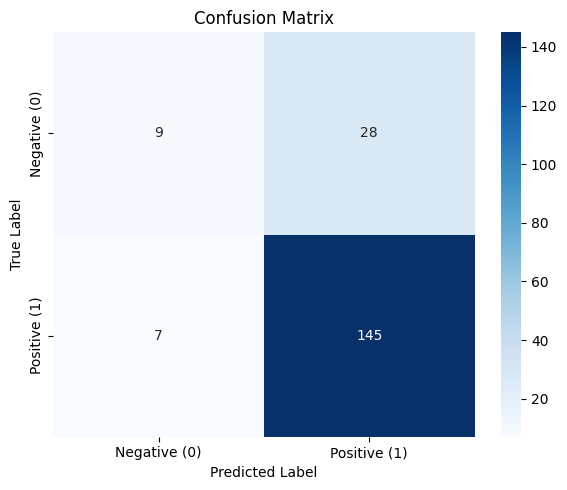

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Optional: define labels
labels = ['Negative (0)', 'Positive (1)']

# Plot with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Use the same pipeline and data as before
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])
param_grid_2 = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [2, 4, 6],
    'classifier__min_samples_split': [2, 5],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

grid_search_2 = GridSearchCV(
    pipeline, param_grid_2, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid_search_2.fit(X_train, y_train)
print("Best parameters (Grid 2):", grid_search_2.best_params_)
print("Best F1 Score (Grid 2):", grid_search_2.best_score_)
best_model = grid_search_2.best_estimator_  # or grid_search_2.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters (Grid 2): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}
Best F1 Score (Grid 2): 0.9019663578243413
              precision    recall  f1-score   support

           0       0.78      0.19      0.30        37
           1       0.83      0.99      0.90       152

    accuracy                           0.83       189
   macro avg       0.81      0.59      0.60       189
weighted avg       0.82      0.83      0.79       189



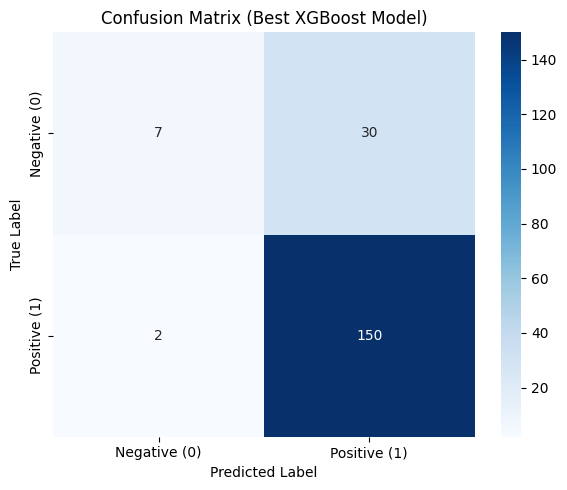

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative (0)', 'Positive (1)']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Best XGBoost Model)')
plt.tight_layout()
plt.show()

In [236]:
import joblib

# Guardar
joblib.dump(best_model, "modelo_entrenado.joblib")

['modelo_entrenado.joblib']

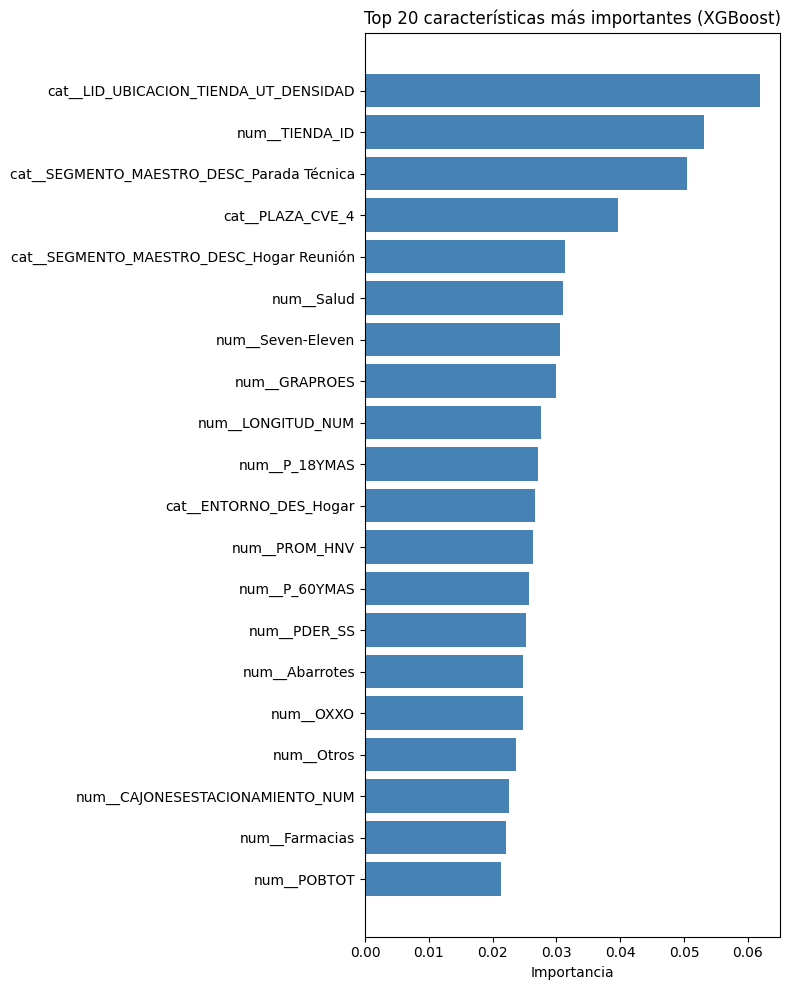

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Extraer el clasificador XGBoost del pipeline
best_xgb_model = best_model.named_steps['classifier']

# 2. Obtener los nombres de las variables después del preprocesamiento
feature_names_out = best_model.named_steps['preprocessor'].get_feature_names_out()

# 3. Obtener las importancias
importances = best_xgb_model.feature_importances_

# 4. Crear un DataFrame ordenado
importance_df = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# 5. Graficar en vertical
plt.figure(figsize=(8, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.gca().invert_yaxis()  # La característica más importante arriba
plt.xlabel("Importancia")
plt.title("Top 20 características más importantes (XGBoost)")
plt.tight_layout()
plt.show()



In [ ]:
# Ya tienes esta parte hecha:
importance_df = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# Imprimir en consola
print("Top 20 características más importantes (XGBoost):\n")
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


Top 20 características más importantes (XGBoost):

cat__LID_UBICACION_TIENDA_UT_DENSIDAD: 0.0619
num__TIENDA_ID: 0.0531
cat__SEGMENTO_MAESTRO_DESC_Parada Técnica: 0.0504
cat__PLAZA_CVE_4: 0.0396
cat__SEGMENTO_MAESTRO_DESC_Hogar Reunión: 0.0314
num__Salud: 0.0310
num__Seven-Eleven: 0.0305
num__GRAPROES: 0.0299
num__LONGITUD_NUM: 0.0276
num__P_18YMAS: 0.0271
cat__ENTORNO_DES_Hogar: 0.0267
num__PROM_HNV: 0.0263
num__P_60YMAS: 0.0257
num__PDER_SS: 0.0252
num__Abarrotes: 0.0247
num__OXXO: 0.0247
num__Otros: 0.0236
num__CAJONESESTACIONAMIENTO_NUM: 0.0226
num__Farmacias: 0.0221
num__POBTOT: 0.0214
